<a href="https://colab.research.google.com/github/szh141/mlproject/blob/main/Hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@ai-club/ml101-un-supervised-machine-learning-hierarchical-clustering-957f7d8b9ecb

Agglomerative vs Decisive write up

In [1]:
 from sklearn.cluster import AgglomerativeClustering
 import numpy as np
 # randomly chosen dataset
 X =np.array([[1, 2], [1, 4], [1, 0],
 [4, 2], [4, 4], [4, 0]])
 # here we need to mention the number of clusters
 # otherwise the result will be a single cluster containing all the data
 clustering = AgglomerativeClustering(n_clusters=2).fit(X)
 # print the class labels
 print(clustering.labels_)

[1 1 1 0 0 0]


Dendrogram example
https://www.learndatasci.com/glossary/hierarchical-clustering/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [6]:
# define a small dataset

X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])
X1.shape

(9, 2)

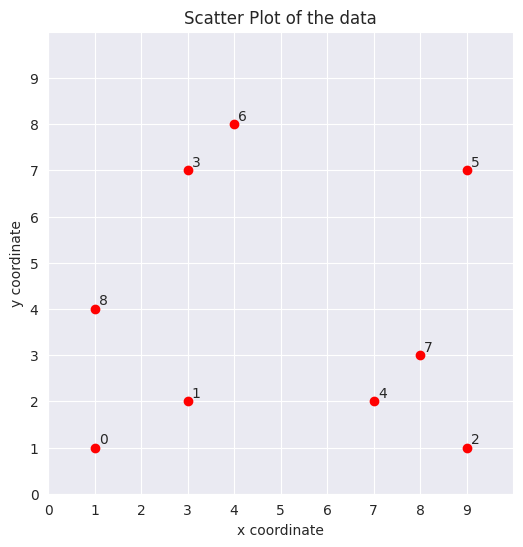

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(X1[:,0],X1[:,1],c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

[0 0 1 0 1 1 0 1 0]


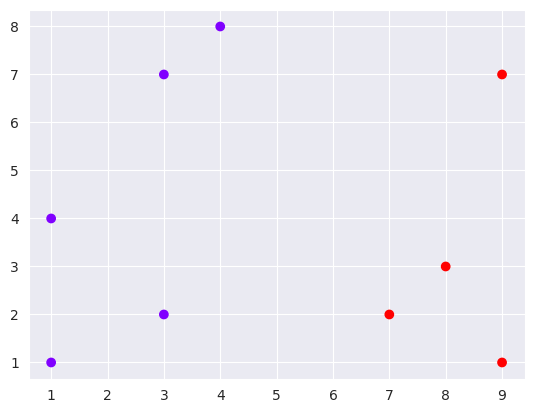

In [17]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

plt.scatter(X1[:,0],X1[:,1],c=Z1.labels_,cmap='rainbow')
from scipy.cluster.hierarchy import dendrogram, linkage
plt.grid()

In [24]:
# real data

from scipy.cluster.hierarchy import dendrogram, linkage

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


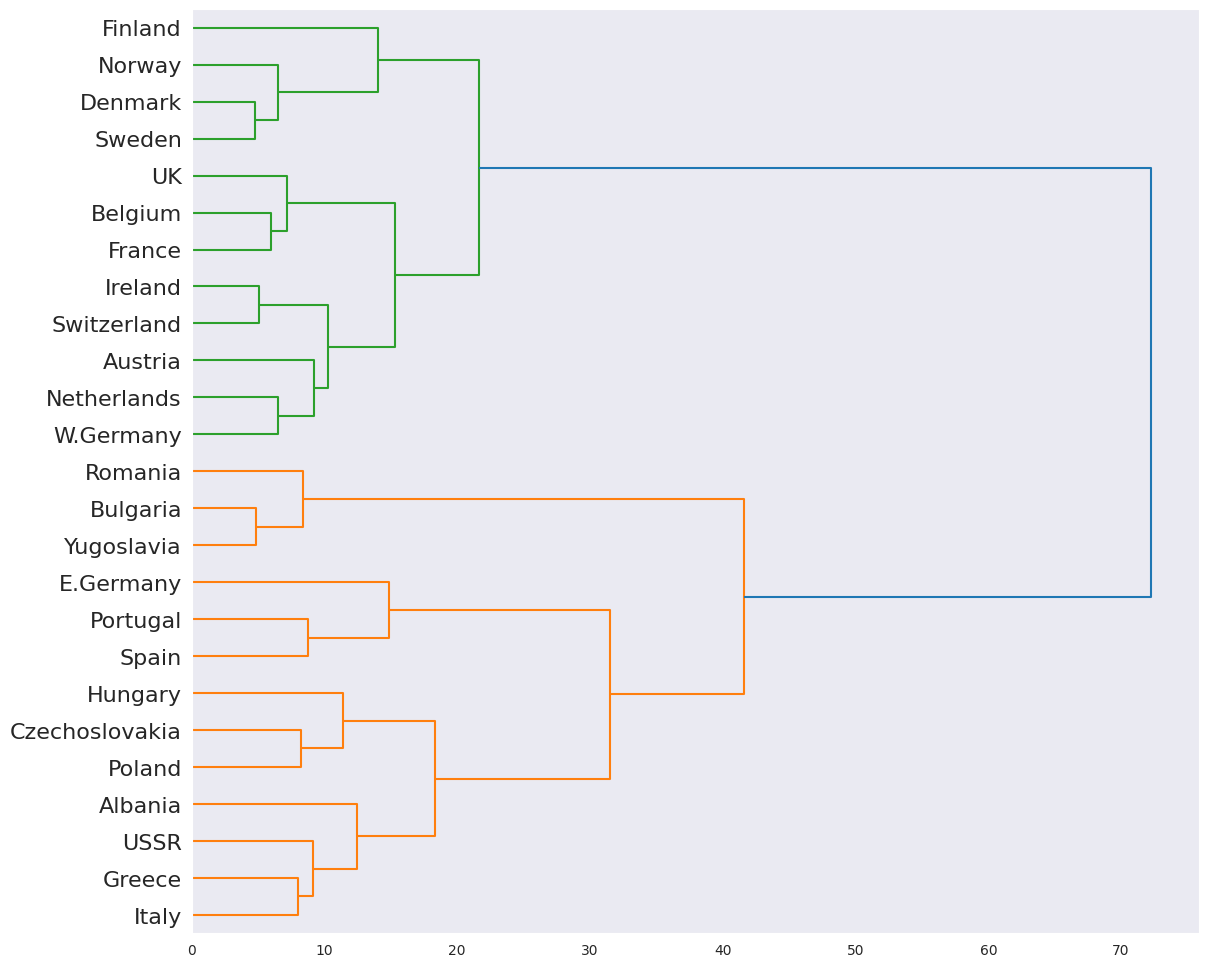

In [26]:
X2 = df.iloc[:,1:10]
Z2 = linkage(X2, method='ward', metric='euclidean')

###########################################

labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()